In [1]:
# Import packages

from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


# Given points, calculate Delaunay triangulation and iteratively calculate centroids of resulting triangles

In [2]:
def triangle_mean(triangle_array): # calculates centroid of a triangle

    xmean = np.mean(triangle_array[:,0]) # calculate centroid xval
    ymean = np.mean(triangle_array[:,1]) # calculate centroid yval
    
    return xmean, ymean

In [3]:
def simplex_centroids(simplex): # calculates centroids for all triangles

    new_means = [] # create empty list

    for i in range(len(simplex)): # for each simplex triangle
        
        xmean, ymean = triangle_mean(simplex[i]) # calculate triangle means
        new_means.append([xmean, ymean]) # append means
    
    new_means = np.array(new_means) # convert to an array
        
    return new_means

In [4]:
def return_new_points(points): # given points, return points + new centroids

    tri = Delaunay(points) # create simplex first

    simplex = points[tri.simplices]

    new_means = simplex_centroids(simplex) # calculate new centroids of triangles

    points_ls = points.tolist() # first, convert arrays to lists
    new_means_ls = new_means.tolist()
    combined_ls = points_ls + new_means_ls # combine points from two lists

    combined_arr = np.array(combined_ls) # convert overall list to an array
    
    return combined_arr

#### A test case with some points

0
1
2
3


(-0.17043331023881053,
 2.6704333102388107,
 -0.7026080876166894,
 9.702608087616689)

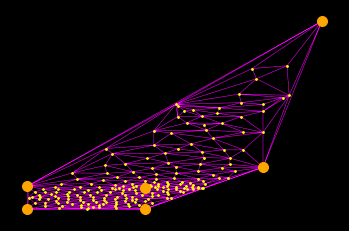

In [5]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1], [2,2], [2.5,9]])
original_points = points

iterations = 4

for i in range(iterations):
    
    print(i)
    
    new_points = return_new_points(original_points)
    original_points = new_points

toplot = original_points


plt.figure(facecolor="black")
plt.triplot(toplot[:,0], toplot[:,1], lw=0.5, c="magenta")
plt.scatter(toplot[:,0], toplot[:,1], s=3, c="yellow", zorder=4)
plt.scatter(points[:,0], points[:,1], s=100, c="orange", zorder=4)
plt.axis("off")
#plt.savefig("./temp/test.jpg",facecolor="black",edgecolor="none")


# Prepare data

In [6]:
# Read in data for grapevine landmarks

data = pd.read_csv("https://raw.githubusercontent.com/DanChitwood/grapevine_shoots/master/Datasets/Procrustes_all.csv")


In [7]:
# Subset data for each species

riparia = data[ data['species']=="Vitis_riparia" ]
labrusca = data[ data['species']=="Vitis_labrusca" ]
rupestris = data[ data['species']=="Vitis_rupestris" ]
cinerea = data[ data['species']=="Vitis_cinerea" ]
acerifolia = data[ data['species']=="Vitis_acerifolia" ]
amurensis = data[ data['species']=="Vitis_amurensis" ]
vulpina = data[ data['species']=="Vitis_vulpina" ]
aestivalis = data[ data['species']=="Vitis_aestivalis" ]
palmata = data[ data['species']=="Vitis_palmata" ]
coignetiae = data[ data['species']=="Vitis_coignetiae" ]
ampelopsis = data[ data['species']=="Ampelopsis_brevipedunculata" ]

In [39]:
# The function "format_array" creates a properly formatted array from dataframe
# The function "model_landmarks" takes a dataframe, polynomial order,
# xvals, and returns modeled values for xvals across a shoot

def format_array(dataframe):
    
    df = dataframe
    df_vals = df.drop(columns=['vine','year','vine_year','species','from_tip','count','bin',
                               'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                               'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17',
                               'PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25',
                               'PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33',
                               'PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41',
                               'PC42'])
    
    df_array = df_vals.values
    return df_array

def model_landmarks(dataframe, poly_order, xvals):
    
    array = format_array(dataframe)
        
    matrix = np.zeros((42, xvals))

    for i in range(42):

        N = np.polyfit( array[:,0], array[:,i+1], poly_order )
        func = np.poly1d(N)
        model_values = func( np.linspace(min(array[:,0]), max(array[:,0]), xvals) )
        matrix[i,:] = model_values

    Tresults = matrix.T
    
    df = pd.DataFrame(data=Tresults, columns=['x1', 'y1', #0, 1
                                              'x2', 'y2', #2, 3
                                              'x3', 'y3', #4, 5
                                              'x4', 'y4', #6, 7
                                              'x5', 'y5', #8, 9
                                              'x6', 'y6', #10, 11
                                              'x7', 'y7', #12, 13
                                              'x8', 'y8', #14, 15
                                              'x9', 'y9', #16, 17
                                              'x10', 'y10', #18, 19
                                              'x11', 'y11', #20, 21
                                              'x12', 'y12', #22, 23
                                              'x13', 'y13', #24, 25
                                              'x14', 'y14', #26, 27
                                              'x15', 'y15', #28, 29
                                              'x16', 'y16', #30, 31
                                              'x17', 'y17', #32, 33
                                              'x18', 'y18', #34, 35
                                              'x19', 'y19', #36, 37
                                              'x20', 'y20', #38, 39
                                              'x21', 'y21'  #40, 41
                                         ])

    return df


In [40]:
df = model_landmarks(dataframe=data, poly_order=2, xvals=100)

In [41]:
df

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,494.494436,374.725665,431.733638,307.577016,491.009892,238.145191,593.160946,180.457762,273.679932,410.574096,...,-692.365617,99.514451,-900.842460,-677.217893,-494.780279,-475.258375,-575.095864,-736.385958,-585.732207,-1883.442992
1,494.577436,371.805351,433.009529,306.186191,491.054038,238.147108,591.003547,181.799950,276.029649,408.904823,...,-694.891006,101.720551,-902.145906,-676.866781,-496.178335,-478.204120,-575.418316,-740.409666,-577.382985,-1879.004968
2,494.666217,368.924057,434.269644,304.810072,491.104869,238.139719,588.889227,183.110417,278.339413,407.266866,...,-697.393246,103.894149,-903.412815,-676.513459,-497.546502,-481.111143,-575.724948,-744.384531,-569.133224,-1874.571120
3,494.760779,366.081781,435.513981,303.448660,491.162387,238.123022,586.817984,184.389161,280.609225,405.660225,...,-699.872338,106.035245,-904.643188,-676.157929,-498.884782,-483.979444,-576.015762,-748.310550,-560.982924,-1870.141449
4,494.861123,363.278525,436.742542,302.101954,491.226590,238.097018,584.789818,185.636183,282.839085,404.084900,...,-702.328281,108.143841,-905.837025,-675.800190,-500.193173,-486.809024,-576.290756,-752.187726,-552.932085,-1865.715954
5,494.967247,360.514287,437.955326,300.769955,491.297480,238.061707,582.804730,186.851483,285.028992,402.540891,...,-704.761076,110.219936,-906.994325,-675.440241,-501.471675,-489.599881,-576.549931,-756.016057,-544.980708,-1861.294637
6,495.079152,357.789069,439.152334,299.452663,491.375055,238.017090,580.862720,188.035061,287.178947,401.028197,...,-707.170723,112.263529,-908.115089,-675.078084,-502.720290,-492.352017,-576.793288,-759.795544,-537.128791,-1856.877496
7,495.196838,355.102869,440.333564,298.150077,491.459316,237.963165,578.963788,189.186916,289.288950,399.546820,...,-709.557220,114.274621,-909.199316,-674.713717,-503.939016,-495.065431,-577.020825,-763.526187,-529.376336,-1852.464531
8,495.320305,352.455688,441.499018,296.862197,491.550264,237.899933,577.107934,190.307049,291.359000,398.096759,...,-711.920570,116.253212,-910.247007,-674.347142,-505.127854,-497.740122,-577.232543,-767.207985,-521.723342,-1848.055744
9,495.449553,349.847527,442.648695,295.589024,491.647897,237.827394,575.295157,191.395460,293.389098,396.678014,...,-714.260770,118.199302,-911.258161,-673.978358,-506.286804,-500.376093,-577.428443,-770.840939,-514.169808,-1843.651133


# Try it out!!!

In [12]:
iterations = 4

for i in range(len(df)):

    landmarks = [] 

    for j in range(21):

        xval = df.iloc[i,j*2]
        yval = df.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)

    points = np.array(landmarks)
    original_points = points
    
    for k in range(iterations):

        new_points = return_new_points(original_points)
        original_points = new_points

    toplot = original_points


    plt.figure(facecolor="black")
    plt.triplot(toplot[:,0], toplot[:,1], lw=1, c="magenta")
    plt.scatter(toplot[:,0], toplot[:,1], s=0.2, c="yellow", zorder=4)
    plt.scatter(points[:,0], points[:,1], s=100, c="orange", zorder=4)
    
    plt.axis("off")
    plt.savefig("./temp/"+str(i)+"test.jpg",facecolor="black",edgecolor="none")
    plt.close()


# Try to fix problem of convex hull by limiting to groups of points

In [80]:
# template df.drop(columns=['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6',
#                           'x7','y7','x8','y8','x9','y9','x10','y10','x11','y11',
#                          'x12','y12','x13','y13','x14','y14','x15','y15','x16','y16',
#                          'x17','y17','x18','y18','x19','y19','x20','y20','x21','y21'])

midvein = df[['x3','y3','x4','y4','x11','y11','x12','y12','x13','y13','x21','y21']].copy()
midvein_branch = df[['x11','y11','x12','y12','x20','y20']].copy()

distal = df[['x2','y2','x3','y3','x8','y8','x9','y9','x10','y10','x18','y18']].copy()
distal_branch = df[['x8','y8','x9','y9','x17','y17']].copy()

proximal = df[['x1','y1','x2','y2','x5','y5','x6','y6','x7','y7','x15','y15']].copy()
proximal_branch = df[['x5','y5','x6','y6','x14','y14']].copy()

region1 = df[['x11','y11','x20','y20','x21','y21']].copy()
region2 = df[['x3','y3','x19','y19','x20','y20','x12','y12']].copy()
region3 = df[['x3','y3','x19','y19','x18','y18','x10','y10']].copy()
region4 = df[['x8','y8','x17','y17','x18','y18']].copy()
region5 = df[['x2','y2','x16','y16','x17','y17','x9','y9']].copy()
region6 = df[['x2','y2','x16','y16','x15','y15','x7','y7']].copy()
region7 = df[['x5','y5','x14','y14','x15','y15']].copy()





In [86]:
iterations = 4
blade_lw = 0.4
vein_s = 1
blade_s = 1

for i in range(len(midvein)):

    # midvein
    landmarks = [] 
    for j in range(6):
        xval = midvein.iloc[i,j*2]
        yval = midvein.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    midvein_plot = original_points

    # midvein_branch
    landmarks = [] 
    for j in range(3):
        xval = midvein_branch.iloc[i,j*2]
        yval = midvein_branch.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    midvein_branch_plot = original_points
    
    # distal
    landmarks = [] 
    for j in range(6):
        xval = distal.iloc[i,j*2]
        yval = distal.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    distal_plot = original_points
    
    # distal_branch
    landmarks = [] 
    for j in range(3):
        xval = distal_branch.iloc[i,j*2]
        yval = distal_branch.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    distal_branch_plot = original_points

    # proximal
    landmarks = [] 
    for j in range(6):
        xval = proximal.iloc[i,j*2]
        yval = proximal.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    proximal_plot = original_points
    
    # proximal_branch
    landmarks = [] 
    for j in range(3):
        xval = proximal_branch.iloc[i,j*2]
        yval = proximal_branch.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    proximal_branch_plot = original_points
    
    # region1
    landmarks = [] 
    for j in range(3):
        xval = region1.iloc[i,j*2]
        yval = region1.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region1_plot = original_points
    
    # region2
    landmarks = [] 
    for j in range(4):
        xval = region2.iloc[i,j*2]
        yval = region2.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region2_plot = original_points
    
    # region3
    landmarks = [] 
    for j in range(4):
        xval = region3.iloc[i,j*2]
        yval = region3.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region3_plot = original_points
    
    # region4
    landmarks = [] 
    for j in range(3):
        xval = region4.iloc[i,j*2]
        yval = region4.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region4_plot = original_points
    
    # region5
    landmarks = [] 
    for j in range(4):
        xval = region5.iloc[i,j*2]
        yval = region5.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region5_plot = original_points
    
    # region6
    landmarks = [] 
    for j in range(4):
        xval = region6.iloc[i,j*2]
        yval = region6.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region6_plot = original_points
    
    # region7
    landmarks = [] 
    for j in range(3):
        xval = region7.iloc[i,j*2]
        yval = region7.iloc[i,(j*2)+1]
        coords = [xval, yval]
        landmarks.append(coords)
    points = np.array(landmarks)
    original_points = points
    for k in range(iterations):
        new_points = return_new_points(original_points)
        original_points = new_points
    region7_plot = original_points
    
    
    plt.figure(figsize=(10,10),facecolor="black")
    
    plt.scatter(midvein_plot[:,0], midvein_plot[:,1], s=vein_s, c="yellow", zorder=4)
    plt.scatter(midvein_branch_plot[:,0], midvein_branch_plot[:,1], s=0.01, c="red", zorder=4)
    plt.scatter(distal_plot[:,0], distal_plot[:,1], s=vein_s, c="yellow", zorder=4)
    plt.scatter(distal_branch_plot[:,0], distal_branch_plot[:,1], s=0.01, c="orange", zorder=4)
    plt.scatter(proximal_plot[:,0], proximal_plot[:,1], s=vein_s, c="yellow", zorder=4)
    plt.scatter(proximal_branch_plot[:,0], proximal_branch_plot[:,1], s=0.01, c="yellow", zorder=4)
    
    plt.triplot(midvein_plot[:,0], midvein_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(midvein_branch_plot[:,0], midvein_branch_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(distal_plot[:,0], distal_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(distal_branch_plot[:,0], distal_branch_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(proximal_plot[:,0], proximal_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(proximal_branch_plot[:,0], proximal_branch_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    
    plt.scatter(region1_plot[:,0], region1_plot[:,1], s=blade_s, c="yellow", zorder=4)
    plt.scatter(region2_plot[:,0], region2_plot[:,1], s=blade_s, c="yellow", zorder=4)
    plt.scatter(region3_plot[:,0], region3_plot[:,1], s=blade_s, c="yellow", zorder=4)
    plt.scatter(region4_plot[:,0], region4_plot[:,1], s=blade_s, c="yellow", zorder=4)
    plt.scatter(region5_plot[:,0], region5_plot[:,1], s=blade_s, c="yellow", zorder=4)
    plt.scatter(region6_plot[:,0], region6_plot[:,1], s=blade_s, c="yellow", zorder=4)
    plt.scatter(region7_plot[:,0], region7_plot[:,1], s=blade_s, c="yellow", zorder=4)
    
    plt.triplot(region1_plot[:,0], region1_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(region2_plot[:,0], region2_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(region3_plot[:,0], region3_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(region4_plot[:,0], region4_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(region5_plot[:,0], region5_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(region6_plot[:,0], region6_plot[:,1], c="magenta", zorder=1, lw=blade_lw)
    plt.triplot(region7_plot[:,0], region7_plot[:,1], c="magenta", zorder=1, lw=blade_lw)

    plt.gca().set_aspect("equal")
    plt.axis("off")
    plt.savefig("./temp/"+str(i)+"test.jpg",facecolor="black",edgecolor="none")
    plt.close()